In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [2]:
# Confusion matrix values
TP = 50
FP = 30
FN = 10
TN = 110

In [3]:
# Reconstruct y_true and y_pred based on confusion matrix
y_true = np.array([1]*TP + [0]*FP + [1]*FN + [0]*TN)
y_pred = np.array([1]*TP + [1]*FP + [0]*FN + [0]*TN)

In [4]:
# ---- Metrics ----
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

In [5]:
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Accuracy: 0.8000
Precision: 0.6250
Recall: 0.8333
F1-Score: 0.7143


In [6]:
# ---- ROC Curve (simulating probability scores) ----
# We'll assign probabilities: correct preds high prob, incorrect preds lower prob
y_prob = np.zeros_like(y_true, dtype=float)

In [7]:
# Assign simulated probabilities
y_prob[y_true==1] = np.where(y_pred[y_true==1]==1, 0.9, 0.4)  # TP high, FN lower
y_prob[y_true==0] = np.where(y_pred[y_true==0]==0, 0.9, 0.4)  # TN high, FP lower

In [8]:
# Compute ROC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

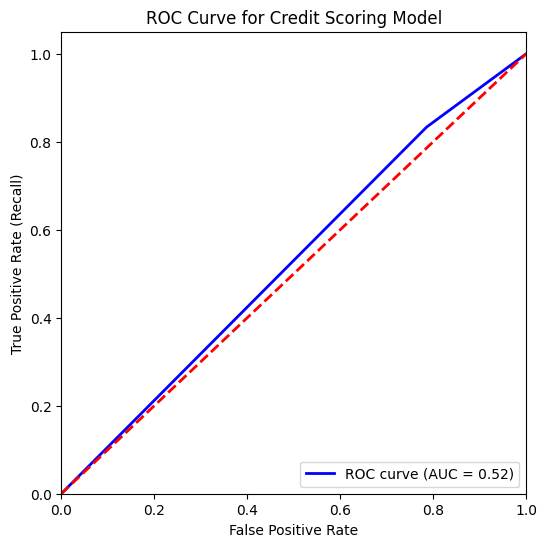

In [9]:
# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Credit Scoring Model")
plt.legend(loc="lower right")
plt.show()
